This notebook accompanies the web tutorial. It trains Multilayer Perceptrons with
different depths (1, 2, 4 hidden layers) on the Fashion-MNIST dataset and
reproduces all plots shown in the webpage.

GitHub repository: YOUR_GITHUB_REPO_URL_HERE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version:", tf.__version__)

# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalise
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten
x_train = x_train.reshape(-1, 28 * 28)
x_test  = x_test.reshape(-1, 28 * 28)

# Train/val split
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train_small = x_train[:-10000]
y_train_small = y_train[:-10000]

x_train_small.shape, x_val.shape, x_test.shape


TensorFlow version: 2.20.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


((50000, 784), (10000, 784), (10000, 784))

In [4]:
def create_mlp(num_hidden_layers=1, hidden_units=128, input_dim=784, num_classes=10):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_dim,)))

    for _ in range(num_hidden_layers):
        model.add(layers.Dense(hidden_units, activation="relu"))

    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


In [5]:
depths = [1, 2, 4]
histories = {}
test_scores = {}

for d in depths:
    print(f"\nTraining MLP with depth = {d}")
    model = create_mlp(num_hidden_layers=d)

    history = model.fit(
        x_train_small, y_train_small,
        validation_data=(x_val, y_val),
        epochs=20,
        batch_size=128,
        verbose=2,
    )

    histories[d] = history.history

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    test_scores[d] = (test_loss, test_acc)
    print(f"Depth {d}: test accuracy = {test_acc:.4f}")



Training MLP with depth = 1
Epoch 1/20
391/391 - 2s - 6ms/step - accuracy: 0.8036 - loss: 0.5695 - val_accuracy: 0.8220 - val_loss: 0.5002
Epoch 2/20
391/391 - 1s - 4ms/step - accuracy: 0.8534 - loss: 0.4157 - val_accuracy: 0.8586 - val_loss: 0.3999
Epoch 3/20
391/391 - 2s - 4ms/step - accuracy: 0.8690 - loss: 0.3719 - val_accuracy: 0.8601 - val_loss: 0.4107
Epoch 4/20
391/391 - 2s - 6ms/step - accuracy: 0.8751 - loss: 0.3515 - val_accuracy: 0.8688 - val_loss: 0.3693
Epoch 5/20
391/391 - 2s - 4ms/step - accuracy: 0.8806 - loss: 0.3311 - val_accuracy: 0.8714 - val_loss: 0.3584
Epoch 6/20
391/391 - 1s - 4ms/step - accuracy: 0.8853 - loss: 0.3159 - val_accuracy: 0.8708 - val_loss: 0.3620
Epoch 7/20
391/391 - 2s - 4ms/step - accuracy: 0.8903 - loss: 0.3008 - val_accuracy: 0.8758 - val_loss: 0.3556
Epoch 8/20
391/391 - 2s - 4ms/step - accuracy: 0.8935 - loss: 0.2908 - val_accuracy: 0.8817 - val_loss: 0.3333
Epoch 9/20
391/391 - 2s - 4ms/step - accuracy: 0.8977 - loss: 0.2795 - val_accuracy

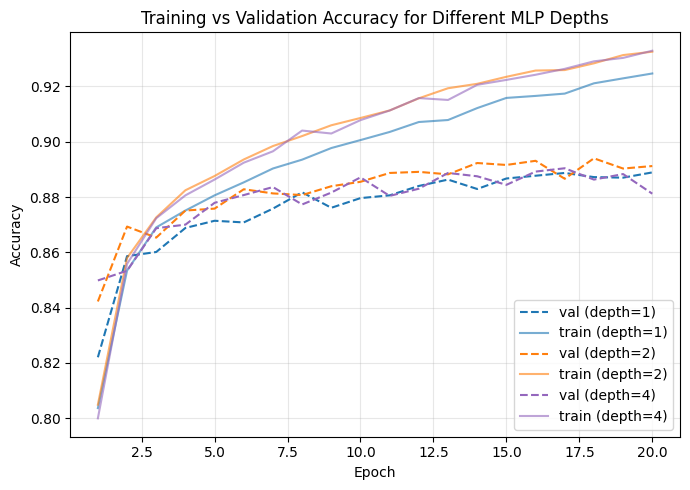

In [8]:
plt.figure(figsize=(7, 5))

colors = {1: "tab:blue", 2: "tab:orange", 4: "tab:purple"}

for d in depths:
    acc = histories[d]["accuracy"]
    val_acc = histories[d]["val_accuracy"]
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, val_acc, linestyle="--", color=colors[d], label=f"val (depth={d})")
    plt.plot(epochs, acc, linestyle="-",  color=colors[d], alpha=0.6, label=f"train (depth={d})")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy for Different MLP Depths")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("figures/acc_curves.png", dpi=200)
plt.show()


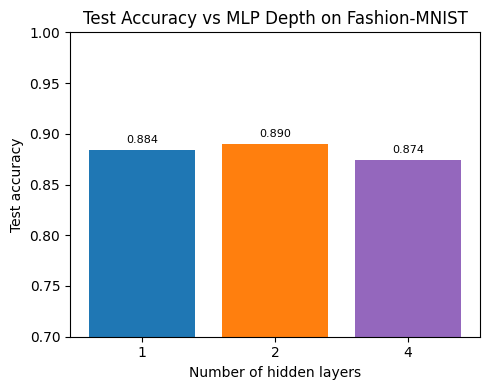

In [7]:
plt.figure(figsize=(5, 4))

depth_list = list(test_scores.keys())
test_accs = [test_scores[d][1] for d in depth_list]

bars = plt.bar([str(d) for d in depth_list], test_accs, color=[colors[d] for d in depth_list])
plt.xlabel("Number of hidden layers")
plt.ylabel("Test accuracy")
plt.ylim(0.7, 1.0)
plt.title("Test Accuracy vs MLP Depth on Fashion-MNIST")

for bar, acc in zip(bars, test_accs):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005,
             f"{acc:.3f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.savefig("figures/test_acc_bars.png", dpi=200)
plt.show()
